#### Read SOOPERSIMS covaiance simulations, beam & map them, and store to disk.

In [46]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [47]:
globals = {
    "sims_dir": "/pscratch/sd/c/cranucci/BB/simulations/sims_cov",
    # "sims_dir": "/pscratch/sd/k/kwolz/bbdev/SOOPERSIMS/output_cov_wmap_planck/sims",
    # "nside": 256,
    "nside": 512,
    "Nsims": 2,
    "freqs": [23, 93, 145, 353],
    # "freqs": [23, 30, 33, 93, 145, 217, 353],
    "beam_arcmin": {
        23: 52.8,
        33: 39.6,
        30: 32.34,
        93: 30,
        100: 9.66,
        143: 7.27,
        145: 17,
        217: 5.01,
        353: 4.86,
    },
}

In [48]:
def beam_gaussian(ll, fwhm_amin):
    """
    Returns the SHT of a Gaussian beam.
    Args:
        l (float or array): multipoles.
        fwhm_amin (float): full-widht half-max in arcmins.
    Returns:
        float or array: beam sampled at `l`.
    """
    sigma_rad = np.radians(fwhm_amin / 2.355 / 60)
    return np.exp(-0.5 * ll * (ll + 1) * sigma_rad**2)


def get_signal_sim(id_sim, freq_ghz, nside, beam_window, sims_dir):
    """ """
    nside = int(nside)
    id_str = str(id_sim).zfill(4)
    freq_str = str(int(freq_ghz)).zfill(3) + "GHz"
    lmax_str = "lmax" + str(int(3 * nside - 1))
    alm_dir = f"{sims_dir}/{id_str}/alm_{freq_str}_{lmax_str}_{id_str}.fits"
    alm_smooth = hp.smoothalm(
        hp.read_alm(alm_dir, hdu=(1, 2, 3)), beam_window=beam_window
    )

    return hp.alm2map(alm_smooth, nside)

In [49]:
nside = globals["nside"]
id_sim = 375
freq_ghz = 145
beam_arcmin = globals["beam_arcmin"][freq_ghz]
beam_window = beam_gaussian(np.arange(3 * nside), beam_arcmin)
maps = get_signal_sim(id_sim, freq_ghz, nside, beam_window, globals["sims_dir"])
print(maps.shape)
hp.mollview(maps[1])

FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/c/cranucci/BB/simulations/sims_cov/0375/alm_145GHz_lmax767_0375.fits'

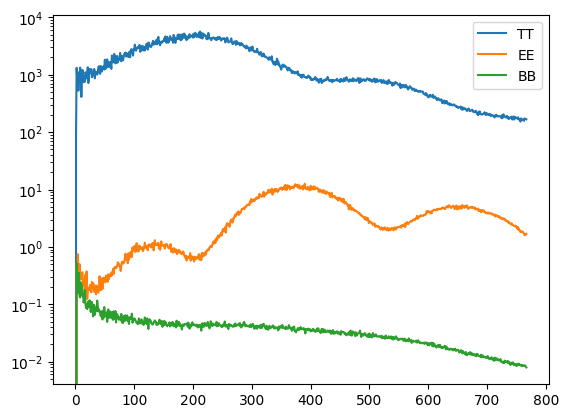

In [50]:
l = np.arange(3 * globals["nside"])
cl2dl = l * (l + 1) / 2.0 / np.pi
cl = hp.anafast(maps)
plt.plot(cl2dl * cl[0], label="TT")
plt.plot(cl2dl * cl[1], label="EE")
plt.plot(cl2dl * cl[2], label="BB")
plt.yscale("log")
plt.legend()